# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco to allow potential real estate investors to choose rental investment properties. 

In [1]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly_express as px
from pathlib import Path

%matplotlib inline

In [4]:
# Read the Mapbox API key
mapbox_token = os.getenv("MAPBOX_API_KEY")

## Load Data

In [123]:
# Read the census data into a Pandas DataFrame
file_path = Path("../Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [124]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!
housing_units_df = sfo_data.groupby('year')['housing_units'].mean()
housing_units_df.head()

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
Name: housing_units, dtype: int64

In [125]:
housing_units_df.max()

384242

In [126]:
housing_units_df.min()

372560

In [127]:
housing_units_df.std()

4206.0007132667015

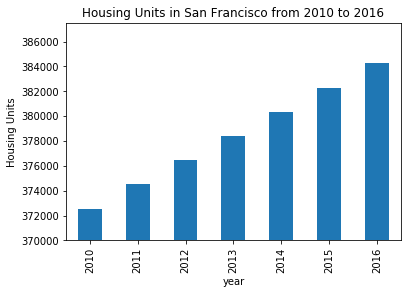

In [128]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!
fig_housing_units = housing_units_df.plot.bar(ylim=(370000, 387500), title = "Housing Units in San Francisco from 2010 to 2016")
plt.ylabel('Housing Units')
plt.show()
plt.close('fig_housing_units')

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!


- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [129]:
# Calculate the average gross rent and average sale price per square foot
# YOUR CODE HERE!
avg_rent_df=sfo_data.groupby('year').mean()
avg_rent_df.drop(columns=['housing_units'], inplace=True)
avg_rent_df

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

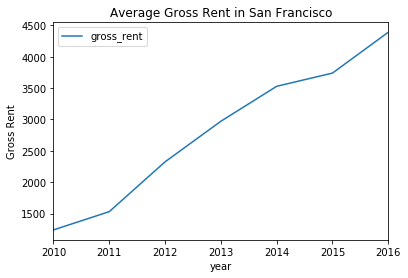

In [130]:
# Plot the Average Gross Rent per Year as a Line Chart 
# YOUR CODE HERE!
avg_rent_df.plot(y='gross_rent', title = 'Average Gross Rent in San Francisco')
plt.ylabel('Gross Rent')
plt.show()
plt.close('fig_avg_rent')

### Average Sales Price per Year

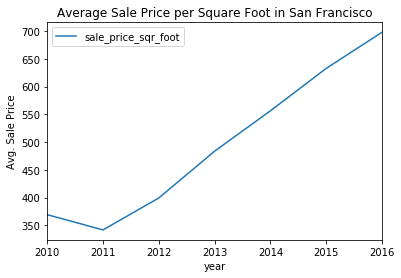

In [131]:
# Plot the Average Sales Price per Year as a line chart
# YOUR CODE HERE!
avg_rent_df.plot(y='sale_price_sqr_foot', title = 'Average Sale Price per Square Foot in San Francisco')
plt.ylabel('Avg. Sale Price')
plt.show()
plt.close('fig_avg_sale')

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [10]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!
avgprices_df = sfo_data.reset_index()
avgprices_df = avgprices_df.rename(columns={"index":"year"})
avgprices_df

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239

In [139]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
avgprices_df.hvplot(x="neighborhood", y="sale_price_sqr_foot")

:Curve   [neighborhood]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [169]:
expensive_df = sfo_data.reset_index()
expensive_df = expensive_df.rename(columns={"index":"neighborhood"})
expensive_df = expensive_df.groupby('sale_price_sqr_foot').max()
expensive_df

year                   neighborhood  housing_units  \
sale_price_sqr_foot                                                       
40.772625            2016                  Outer Mission         384242   
88.401511            2016                     Anza Vista         384242   
108.012927           2010         Van Ness/ Civic Center         372560   
142.142568           2011                  Outer Mission         374507   
145.853380           2011                  Croker Amazon         374507   
162.821210           2010       Financial District South         372560   
165.645730           2010                  Croker Amazon         372560   
165.798062           2012                        Bayview         376454   
170.098665           2010                        Bayview         372560   
170.292549           2014                 Silver Terrace         380348   
170.624920           2010                  Hunters Point         372560   
171.772347           2011               Buena Vista Park         374507   
172.540562           2011                        Bayview         374507   
175.066069           2016                   Hayes Valley         384242   
183.099317           2012                   Alamo Square         376454   
192.165248           2015                     Ingleside          382295   
198.015873           2011              Ingleside Heights         374507   
199.702004           2010                 Inner Parkside         372560   
208.167997           2011                        Portola         374507   
209.049327           2010                  Forest Knolls         372560   
211.301370           2016                     Park North         384242   
215.569134           2010               Western Addition         372560   
217.089069           2013               Western Addition         378401   
217.558787           2011                       Parkside         374507   
220.111087           2014                    Mission Bay         380348   
221.881139           2012                  Outer Mission         376454   
222.567848           2011                 Corona Heights         374507   
223.115833           2013                  Croker Amazon         378401   
227.418981           2011               Western Addition         374507   
234.281624           2011                      Downtown          374507   
...                   ...                            ...            ...   
851.401405           2016               Buena Vista Park         384242   
879.017013           2016                Mission Terrace         384242   
888.182144           2014                 Corona Heights         380348   
890.909593           2015               North Waterfront         382295   
903.049771           2016                 Telegraph Hill         384242   
910.187690           2015                Pacific Heights         382295   
918.288268           2015                  Lone Mountain         382295   
924.569116           2016                    Mission Bay         384242   
945.566502           2016                      Glen Park         384242   
956.184122           2013            Golden Gate Heights         378401   
963.522606           2015                    Yerba Buena         382295   
970.085470           2016                     Twin Peaks         384242   
986.842105           2016                Bernal Heights          384242   
996.389364           2016                Pacific Heights         384242   
996.990220           2015                 Telegraph Hill         382295   
1024.339877          2016                   Russian Hill         384242   
1026.791108          2016  Eureka Valley/Dolores Heights         384242   
1037.099789          2010                    South Beach         372560   
1045.201546          2014                   Potrero Hill         380348   
1059.065602          2016                     Cow Hollow         384242   
1100.791194          2015                 Coro

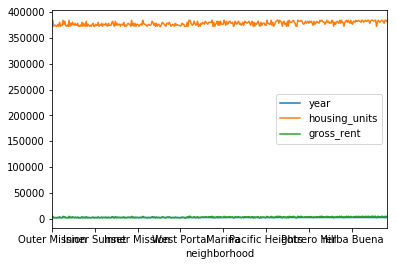

In [170]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
# Not sure ugh....
expensive_df.plot(x='neighborhood')

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

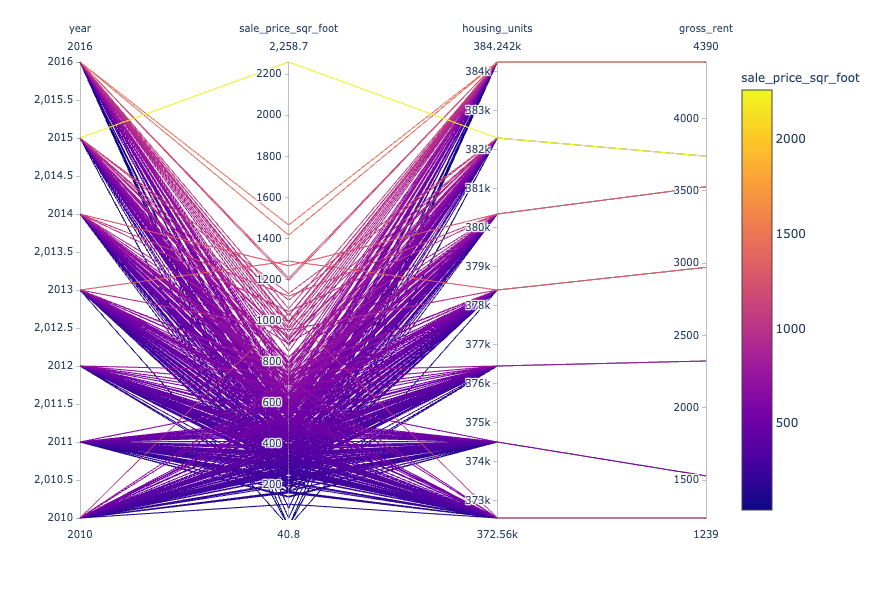

In [171]:
#I know the data is wrong visually, but heres the code..
px.parallel_coordinates(avgprices_df, color='sale_price_sqr_foot')


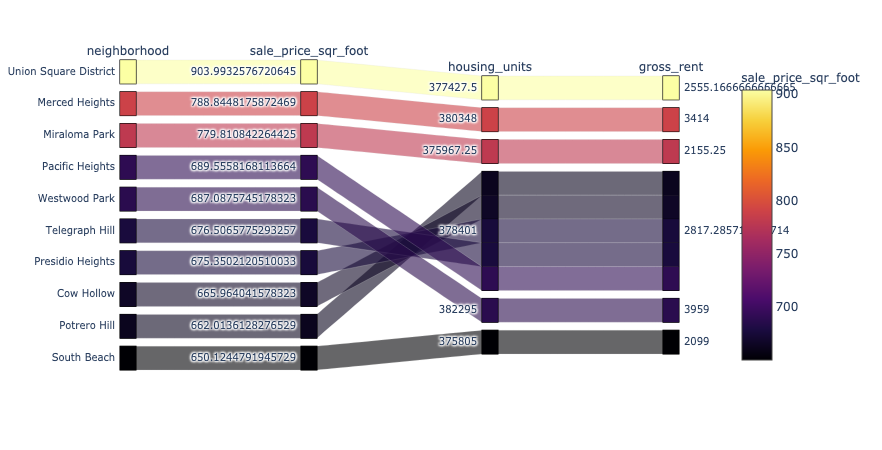

In [15]:
# Parallel Categories Plot
# YOUR CODE HERE!
#Definitely wrong visually, but I'm sure of the code...
px.parallel_categories(
    avgprices_df,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    labels={
        "neighborhood": "Neighborhood",
        "sale_price_sqr_foot": "Sale Price per Sqr Foot",
        "housing_units": "Housing Units",
        "gross_rent": "Gross Rent"
    },
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [173]:
# Load neighborhoods coordinates data
file_path = Path("../Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [17]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
mean_df = sfo_data.groupby('year')['housing_units'].mean()

Neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0     Alamo Square           366.020712       378401.0  2817.285714
1       Anza Vista           373.382198       379050.0  3031.833333
2          Bayview           204.588623       376454.0  2318.400000
3  Bayview Heights           590.792839       382295.0  3739.000000
4  Bernal Heights            576.746488       379374.5  3080.333333

In [185]:
mean_df=sfo_data.reset_index()
mean_df.groupby("neighborhood")['housing_units']
mean_df

year                   neighborhood  sale_price_sqr_foot  housing_units  \
0    2010                   Alamo Square           291.182945         372560   
1    2010                     Anza Vista           267.932583         372560   
2    2010                        Bayview           170.098665         372560   
3    2010               Buena Vista Park           347.394919         372560   
4    2010               Central Richmond           319.027623         372560   
5    2010                 Central Sunset           418.172493         372560   
6    2010                 Corona Heights           369.359338         372560   
7    2010                     Cow Hollow           569.379968         372560   
8    2010                  Croker Amazon           165.645730         372560   
9    2010                Diamond Heights           456.930822         372560   
10   2010                      Downtown            241.804552         372560   
11   2010  Eureka Valley/Dolores Heights           403.118313         372560   
12   2010                      Excelsior           364.928336         372560   
13   2010       Financial District North           401.749967         372560   
14   2010       Financial District South           162.821210         372560   
15   2010                  Forest Knolls           209.049327         372560   
16   2010                      Glen Park           715.586438         372560   
17   2010            Golden Gate Heights           551.801119         372560   
18   2010                 Haight Ashbury           254.473779         372560   
19   2010                   Hayes Valley           272.284980         372560   
20   2010                  Hunters Point           170.624920         372560   
21   2010                     Ingleside            275.056686         372560   
22   2010                  Inner Mission           238.350020         372560   
23   2010                 Inner Parkside           199.702004         372560   
24   2010                 Inner Richmond           285.822358         372560   
25   2010                   Inner Sunset           275.769730         372560   
26   2010     Jordan Park/Laurel Heights           419.887812         372560   
27   2010            Lake --The Presidio           320.796910         372560   
28   2010                  Lone Mountain           398.458876         372560   
29   2010          Lower Pacific Heights           374.057636         372560   
..    ...                            ...                  ...            ...   
367  2016                  Inner Mission           647.770447         384242   
368  2016                 Inner Parkside           518.112650         384242   
369  2016                 Inner Richmond           403.311132         384242   
370  2016                   Inner Sunset           445.923828         384242   
371  2016     Jordan Park/Laurel Heights           704.566419         384242   
372  2016          Lower Pacific Heights           636.430770         384242   
373  2016                         Marina           431.944602         384242   
374  2016                 Merced Heights          1416.666667         384242   
375  2016                    Mission Bay           924.569116         384242   
376  2016                Mission Terrace           879.017013         384242   
377  2016                       Nob Hill           777.008315         384242   
378  2016                     Noe Valley           799.495651         384242   
379  2016                    North Beach           407.553322         384242   
380  2016                  Outer Mission            40.772625         384242   
381  2016                 Outer Parkside           732.720684         384242   
382  2016                Outer Richmond           1196.645437         384242   
383  2016                   Outer Sunset           510.576907         384242   
384  2016                Pacific Heights           996.389364         384242   
385  

In [18]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!
combined_df=pd.concat([mean_df, df_neighborhood_locations], axis="columns", join="inner")

Neighborhood        Lat         Lon  sale_price_sqr_foot  \
0      Alamo Square  37.791012 -122.402100           366.020712   
1        Anza Vista  37.779598 -122.443451           373.382198   
2           Bayview  37.734670 -122.401060           204.588623   
3   Bayview Heights  37.728740 -122.410980           590.792839   
4  Buena Vista Park  37.768160 -122.439330           452.680591   

   housing_units   gross_rent  
0       378401.0  2817.285714  
1       379050.0  3031.833333  
2       376454.0  2318.400000  
3       382295.0  3739.000000  
4       378076.5  2698.833333

### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

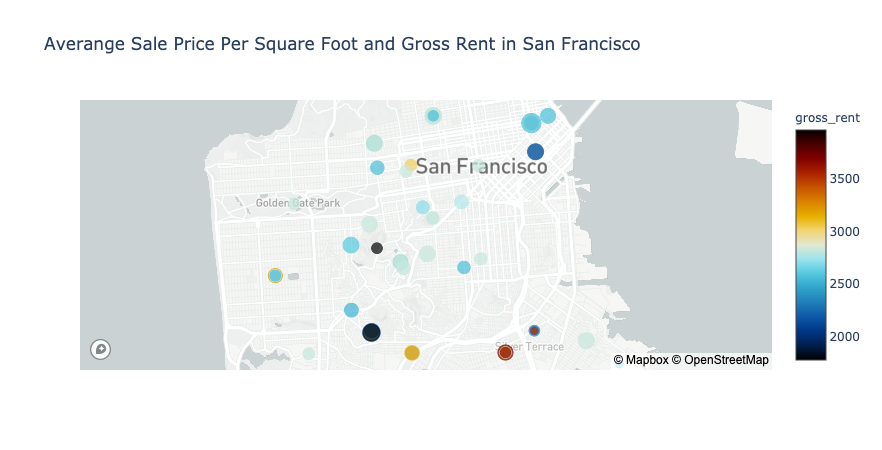

In [19]:
# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!
px.scatter_mapbox(
    combined_df,
    lat="Latitude",
    lon="Longitude",
    size="sale_price_sqr_foot",
    color="gross_rent",
)